In [40]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 12,8
plt.rc('xtick', labelsize='x-large')
plt.rc('font', size=15, weight='normal')
plt.rc('ytick', labelsize='x-large')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelweight"] = 'normal'
plt.rcParams["lines.markersize"] = 10
plt.rc('xtick.major',size=4,width=3)
plt.rc('ytick.major',size=4,width=3)
plt.rc('xtick.minor',visible=True,size=3,width=1)
plt.rc('ytick.minor',visible=True,size=3,width=1)



plt.rcParams['savefig.dpi'] = 300

In [41]:
import pandas as pd

import obspy
from obspy import read, read_inventory
from obspy.signal import PPSD
import numpy as np
import statistics
from obspy.imaging.cm import viridis_white

In [42]:
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

In [61]:
ppsd = PPSD.load_npz("NPZ/ELIS/ELIS.HHZ.29_89.smoothed.npz", allow_pickle=True)

In [43]:
params_2017 =  pd.read_csv('CSV/NoiseAndWindSpeed/ELIS/2017/5th_percentile_ELIS_HHZ_lin1_lin2_parameters_10seg_weighted_STD_10_02.03.2020.csv', index_col=['Period'])

In [44]:
params_2017 = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS/2017/5th_percentile_ELIS_HHZ_lin1_lin2_smoothed_then_mean_parameters_10seg_weighted_STD_10_05.03.2020.csv', index_col=['Period'])


In [45]:
ELIS = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS/2017/5th_percentile_ELIS_HHZ_lin1_lin2_smoothed_then_mean_parameters_10seg_weighted_STD_10_05.03.2020.csv', index_col=['Period'])


In [46]:
allperiods = [  2.00000000e-02,   2.01740397e-02,   2.03495938e-02,
         2.05266757e-02,   2.07052985e-02,   2.08854756e-02,
         2.10672207e-02,   2.12505473e-02,   2.14354693e-02,
         2.16220004e-02,   2.18101547e-02,   2.19999463e-02,
         2.21913894e-02,   2.23844986e-02,   2.25792881e-02,
         2.27757727e-02,   2.29739671e-02,   2.31738862e-02,
         2.33755450e-02,   2.35789586e-02,   2.37841423e-02,
         2.39911115e-02,   2.41998818e-02,   2.44104688e-02,
         2.46228883e-02,   2.48371562e-02,   2.50532888e-02,
         2.52713021e-02,   2.54912125e-02,   2.57130367e-02,
         2.59367911e-02,   2.61624926e-02,   2.63901582e-02,
         2.66198049e-02,   2.68514501e-02,   2.70851109e-02,
         2.73208051e-02,   2.75585503e-02,   2.77983644e-02,
         2.80402653e-02,   2.82842712e-02,   2.85304005e-02,
         2.87786716e-02,   2.90291031e-02,   2.92817139e-02,
         2.95365229e-02,   2.97935493e-02,   3.00528122e-02,
         3.03143313e-02,   3.05781262e-02,   3.08442165e-02,
         3.11126224e-02,   3.13833639e-02,   3.16564614e-02,
         3.19319355e-02,   3.22098066e-02,   3.24900959e-02,
         3.27728241e-02,   3.30580127e-02,   3.33456830e-02,
         3.36358566e-02,   3.39285553e-02,   3.42238010e-02,
         3.45216160e-02,   3.48220225e-02,   3.51250432e-02,
         3.54307008e-02,   3.57390181e-02,   3.60500185e-02,
         3.63637252e-02,   3.66801617e-02,   3.69993519e-02,
         3.73213197e-02,   3.76460892e-02,   3.79736848e-02,
         3.83041312e-02,   3.86374532e-02,   3.89736756e-02,
         3.93128239e-02,   3.96549235e-02,   4.00000000e-02,
         4.03480794e-02,   4.06991877e-02,   4.10533514e-02,
         4.14105970e-02,   4.17709513e-02,   4.21344414e-02,
         4.25010947e-02,   4.28709385e-02,   4.32440007e-02,
         4.36203093e-02,   4.39998925e-02,   4.43827789e-02,
         4.47689971e-02,   4.51585762e-02,   4.55515454e-02,
         4.59479342e-02,   4.63477724e-02,   4.67510899e-02,
         4.71579172e-02,   4.75682846e-02,   4.79822230e-02,
         4.83997636e-02,   4.88209375e-02,   4.92457765e-02,
         4.96743125e-02,   5.01065775e-02,   5.05426042e-02,
         5.09824251e-02,   5.14260733e-02,   5.18735822e-02,
         5.23249853e-02,   5.27803164e-02,   5.32396099e-02,
         5.37029001e-02,   5.41702219e-02,   5.46416103e-02,
         5.51171007e-02,   5.55967288e-02,   5.60805306e-02,
         5.65685425e-02,   5.70608010e-02,   5.75573432e-02,
         5.80582063e-02,   5.85634278e-02,   5.90730458e-02,
         5.95870985e-02,   6.01056245e-02,   6.06286627e-02,
         6.11562523e-02,   6.16884330e-02,   6.22252448e-02,
         6.27667278e-02,   6.33129229e-02,   6.38638709e-02,
         6.44196133e-02,   6.49801917e-02,   6.55456483e-02,
         6.61160255e-02,   6.66913660e-02,   6.72717132e-02,
         6.78571106e-02,   6.84476021e-02,   6.90432320e-02,
         6.96440451e-02,   7.02500864e-02,   7.08614015e-02,
         7.14780363e-02,   7.21000370e-02,   7.27274504e-02,
         7.33603235e-02,   7.39987038e-02,   7.46426393e-02,
         7.52921784e-02,   7.59473697e-02,   7.66082625e-02,
         7.72749063e-02,   7.79473513e-02,   7.86256479e-02,
         7.93098470e-02,   8.00000000e-02,   8.06961587e-02,
         8.13983754e-02,   8.21067027e-02,   8.28211939e-02,
         8.35419026e-02,   8.42688829e-02,   8.50021893e-02,
         8.57418770e-02,   8.64880014e-02,   8.72406186e-02,
         8.79997851e-02,   8.87655578e-02,   8.95379942e-02,
         9.03171524e-02,   9.11030908e-02,   9.18958684e-02,
         9.26955448e-02,   9.35021799e-02,   9.43158343e-02,
         9.51365692e-02,   9.59644461e-02,   9.67995271e-02,
         9.76418751e-02,   9.84915531e-02,   9.93486250e-02,
         1.00213155e-01,   1.01085208e-01,   1.01964850e-01,
         1.02852147e-01,   1.03747164e-01,   1.04649971e-01,
         1.05560633e-01,   1.06479220e-01,   1.07405800e-01,
         1.08340444e-01,   1.09283221e-01,   1.10234201e-01,
         1.11193458e-01,   1.12161061e-01,   1.13137085e-01,
         1.14121602e-01,   1.15114686e-01,   1.16116413e-01,
         1.17126856e-01,   1.18146092e-01,   1.19174197e-01,
         1.20211249e-01,   1.21257325e-01,   1.22312505e-01,
         1.23376866e-01,   1.24450490e-01,   1.25533456e-01,
         1.26625846e-01,   1.27727742e-01,   1.28839227e-01,
         1.29960383e-01,   1.31091297e-01,   1.32232051e-01,
         1.33382732e-01,   1.34543426e-01,   1.35714221e-01,
         1.36895204e-01,   1.38086464e-01,   1.39288090e-01,
         1.40500173e-01,   1.41722803e-01,   1.42956073e-01,
         1.44200074e-01,   1.45454901e-01,   1.46720647e-01,
         1.47997408e-01,   1.49285279e-01,   1.50584357e-01,
         1.51894739e-01,   1.53216525e-01,   1.54549813e-01,
         1.55894703e-01,   1.57251296e-01,   1.58619694e-01,
         1.60000000e-01,   1.61392317e-01,   1.62796751e-01,
         1.64213405e-01,   1.65642388e-01,   1.67083805e-01,
         1.68537766e-01,   1.70004379e-01,   1.71483754e-01,
         1.72976003e-01,   1.74481237e-01,   1.75999570e-01,
         1.77531116e-01,   1.79075988e-01,   1.80634305e-01,
         1.82206182e-01,   1.83791737e-01,   1.85391090e-01,
         1.87004360e-01,   1.88631669e-01,   1.90273138e-01,
         1.91928892e-01,   1.93599054e-01,   1.95283750e-01,
         1.96983106e-01,   1.98697250e-01,   2.00426310e-01,
         2.02170417e-01,   2.03929700e-01,   2.05704293e-01,
         2.07494329e-01,   2.09299941e-01,   2.11121266e-01,
         2.12958440e-01,   2.14811600e-01,   2.16680888e-01,
         2.18566441e-01,   2.20468403e-01,   2.22386915e-01,
         2.24322123e-01,   2.26274170e-01,   2.28243204e-01,
         2.30229373e-01,   2.32232825e-01,   2.34253711e-01,
         2.36292183e-01,   2.38348394e-01,   2.40422498e-01,
         2.42514651e-01,   2.44625009e-01,   2.46753732e-01,
         2.48900979e-01,   2.51066911e-01,   2.53251692e-01,
         2.55455484e-01,   2.57678453e-01,   2.59920767e-01,
         2.62182593e-01,   2.64464102e-01,   2.66765464e-01,
         2.69086853e-01,   2.71428442e-01,   2.73790408e-01,
         2.76172928e-01,   2.78576180e-01,   2.81000346e-01,
         2.83445606e-01,   2.85912145e-01,   2.88400148e-01,
         2.90909801e-01,   2.93441294e-01,   2.95994815e-01,
         2.98570557e-01,   3.01168713e-01,   3.03789479e-01,
         3.06433050e-01,   3.09099625e-01,   3.11789405e-01,
         3.14502592e-01,   3.17239388e-01,   3.20000000e-01,
         3.22784635e-01,   3.25593501e-01,   3.28426811e-01,
         3.31284776e-01,   3.34167610e-01,   3.37075532e-01,
         3.40008757e-01,   3.42967508e-01,   3.45952006e-01,
         3.48962474e-01,   3.51999140e-01,   3.55062231e-01,
         3.58151977e-01,   3.61268610e-01,   3.64412363e-01,
         3.67583474e-01,   3.70782179e-01,   3.74008720e-01,
         3.77263337e-01,   3.80546277e-01,   3.83857784e-01,
         3.87198109e-01,   3.90567500e-01,   3.93966212e-01,
         3.97394500e-01,   4.00852620e-01,   4.04340833e-01,
         4.07859401e-01,   4.11408587e-01,   4.14988657e-01,
         4.18599882e-01,   4.22242531e-01,   4.25916879e-01,
         4.29623201e-01,   4.33361775e-01,   4.37132882e-01,
         4.40936805e-01,   4.44773830e-01,   4.48644245e-01,
         4.52548340e-01,   4.56486408e-01,   4.60458746e-01,
         4.64465650e-01,   4.68507423e-01,   4.72584367e-01,
         4.76696788e-01,   4.80844996e-01,   4.85029301e-01,
         4.89250018e-01,   4.93507464e-01,   4.97801958e-01,
         5.02133823e-01,   5.06503383e-01,   5.10910967e-01,
         5.15356906e-01,   5.19841534e-01,   5.24365186e-01,
         5.28928204e-01,   5.33530928e-01,   5.38173706e-01,
         5.42856885e-01,   5.47580816e-01,   5.52345856e-01,
         5.57152361e-01,   5.62000691e-01,   5.66891212e-01,
         5.71824290e-01,   5.76800296e-01,   5.81819603e-01,
         5.86882588e-01,   5.91989630e-01,   5.97141115e-01,
         6.02337427e-01,   6.07578957e-01,   6.12866100e-01,
         6.18199251e-01,   6.23578810e-01,   6.29005183e-01,
         6.34478776e-01,   6.40000000e-01,   6.45569270e-01,
         6.51187003e-01,   6.56853622e-01,   6.62569551e-01,
         6.68335221e-01,   6.74151063e-01,   6.80017515e-01,
         6.85935016e-01,   6.91904011e-01,   6.97924949e-01,
         7.03998280e-01,   7.10124462e-01,   7.16303954e-01,
         7.22537219e-01,   7.28824726e-01,   7.35166947e-01,
         7.41564358e-01,   7.48017439e-01,   7.54526675e-01,
         7.61092554e-01,   7.67715569e-01,   7.74396217e-01,
         7.81135000e-01,   7.87932425e-01,   7.94789000e-01,
         8.01705241e-01,   8.08681667e-01,   8.15718801e-01,
         8.22817173e-01,   8.29977315e-01,   8.37199764e-01,
         8.44485063e-01,   8.51833758e-01,   8.59246402e-01,
         8.66723550e-01,   8.74265764e-01,   8.81873611e-01,
         8.89547661e-01,   8.97288490e-01,   9.05096680e-01,
         9.12972817e-01,   9.20917491e-01,   9.28931300e-01,
         9.37014845e-01,   9.45168733e-01,   9.53393576e-01,
         9.61689992e-01,   9.70058603e-01,   9.78500037e-01,
         9.87014928e-01,   9.95603916e-01,   1.00426765e+00,
         1.01300677e+00,   1.02182193e+00,   1.03071381e+00,
         1.03968307e+00,   1.04873037e+00,   1.05785641e+00,
         1.06706186e+00,   1.07634741e+00,   1.08571377e+00,
         1.09516163e+00,   1.10469171e+00,   1.11430472e+00,
         1.12400138e+00,   1.13378242e+00,   1.14364858e+00,
         1.15360059e+00,   1.16363921e+00,   1.17376518e+00,
         1.18397926e+00,   1.19428223e+00,   1.20467485e+00,
         1.21515791e+00,   1.22573220e+00,   1.23639850e+00,
         1.24715762e+00,   1.25801037e+00,   1.26895755e+00,
         1.28000000e+00,   1.29113854e+00,   1.30237401e+00,
         1.31370724e+00,   1.32513910e+00,   1.33667044e+00,
         1.34830213e+00,   1.36003503e+00,   1.37187003e+00,
         1.38380802e+00,   1.39584990e+00,   1.40799656e+00,
         1.42024892e+00,   1.43260791e+00,   1.44507444e+00,
         1.45764945e+00,   1.47033389e+00,   1.48312872e+00,
         1.49603488e+00,   1.50905335e+00,   1.52218511e+00,
         1.53543114e+00,   1.54879243e+00,   1.56227000e+00,
         1.57586485e+00,   1.58957800e+00,   1.60341048e+00,
         1.61736333e+00,   1.63143760e+00,   1.64563435e+00,
         1.65995463e+00,   1.67439953e+00,   1.68897013e+00,
         1.70366752e+00,   1.71849280e+00,   1.73344710e+00,
         1.74853153e+00,   1.76374722e+00,   1.77909532e+00,
         1.79457698e+00,   1.81019336e+00,   1.82594563e+00,
         1.84183498e+00,   1.85786260e+00,   1.87402969e+00,
         1.89033747e+00,   1.90678715e+00,   1.92337998e+00,
         1.94011721e+00,   1.95700007e+00,   1.97402986e+00,
         1.99120783e+00,   2.00853529e+00,   2.02601353e+00,
         2.04364387e+00,   2.06142762e+00,   2.07936613e+00,
         2.09746075e+00,   2.11571281e+00,   2.13412371e+00,
         2.15269482e+00,   2.17142754e+00,   2.19032327e+00,
         2.20938342e+00,   2.22860944e+00,   2.24800277e+00,
         2.26756485e+00,   2.28729716e+00,   2.30720118e+00,
         2.32727841e+00,   2.34753035e+00,   2.36795852e+00,
         2.38856446e+00,   2.40934971e+00,   2.43031583e+00,
         2.45146440e+00,   2.47279700e+00,   2.49431524e+00,
         2.51602073e+00,   2.53791510e+00,   2.56000000e+00,
         2.58227708e+00,   2.60474801e+00,   2.62741449e+00,
         2.65027821e+00,   2.67334088e+00,   2.69660425e+00,
         2.72007006e+00,   2.74374006e+00,   2.76761605e+00,
         2.79169980e+00,   2.81599312e+00,   2.84049785e+00,
         2.86521581e+00,   2.89014888e+00,   2.91529890e+00,
         2.94066779e+00,   2.96625743e+00,   2.99206976e+00,
         3.01810670e+00,   3.04437021e+00,   3.07086227e+00,
         3.09758487e+00,   3.12454000e+00,   3.15172970e+00,
         3.17915600e+00,   3.20682096e+00,   3.23472667e+00,
         3.26287521e+00,   3.29126869e+00,   3.31990926e+00,
         3.34879906e+00,   3.37794025e+00,   3.40733503e+00,
         3.43698561e+00,   3.46689420e+00,   3.49706306e+00,
         3.52749444e+00,   3.55819064e+00,   3.58915396e+00,
         3.62038672e+00,   3.65189127e+00,   3.68366996e+00,
         3.71572520e+00,   3.74805938e+00,   3.78067493e+00,
         3.81357431e+00,   3.84675997e+00,   3.88023441e+00,
         3.91400015e+00,   3.94805971e+00,   3.98241566e+00,
         4.01707058e+00,   4.05202706e+00,   4.08728774e+00,
         4.12285525e+00,   4.15873227e+00,   4.19492149e+00,
         4.23142563e+00,   4.26824743e+00,   4.30538965e+00,
         4.34285508e+00,   4.38064653e+00,   4.41876685e+00,
         4.45721888e+00,   4.49600553e+00,   4.53512970e+00,
         4.57459432e+00,   4.61440237e+00,   4.65455682e+00,
         4.69506070e+00,   4.73591704e+00,   4.77712892e+00,
         4.81869942e+00,   4.86063166e+00,   4.90292880e+00,
         4.94559400e+00,   4.98863048e+00,   5.03204146e+00,
         5.07583021e+00,   5.12000000e+00,   5.16455416e+00,
         5.20949602e+00,   5.25482897e+00,   5.30055641e+00,
         5.34668177e+00,   5.39320850e+00,   5.44014012e+00,
         5.48748013e+00,   5.53523209e+00,   5.58339959e+00,
         5.63198624e+00,   5.68099570e+00,   5.73043163e+00,
         5.78029775e+00,   5.83059781e+00,   5.88133558e+00,
         5.93251486e+00,   5.98413951e+00,   6.03621340e+00,
         6.08874043e+00,   6.14172455e+00,   6.19516974e+00,
         6.24908000e+00,   6.30345940e+00,   6.35831200e+00,
         6.41364193e+00,   6.46945333e+00,   6.52575041e+00,
         6.58253739e+00,   6.63981852e+00,   6.69759811e+00,
         6.75588050e+00,   6.81467007e+00,   6.87397121e+00,
         6.93378840e+00,   6.99412611e+00,   7.05498889e+00,
         7.11638129e+00,   7.17830792e+00,   7.24077344e+00,
         7.30378253e+00,   7.36733993e+00,   7.43145040e+00,
         7.49611876e+00,   7.56134987e+00,   7.62714861e+00,
         7.69351993e+00,   7.76046882e+00,   7.82800029e+00,
         7.89611943e+00,   7.96483133e+00,   8.03414116e+00,
         8.10405413e+00,   8.17457548e+00,   8.24571050e+00,
         8.31746454e+00,   8.38984298e+00,   8.46285126e+00,
         8.53649485e+00,   8.61077929e+00,   8.68571015e+00,
         8.76129306e+00,   8.83753369e+00,   8.91443777e+00,
         8.99201106e+00,   9.07025940e+00,   9.14918865e+00,
         9.22880474e+00,   9.30911365e+00,   9.39012140e+00,
         9.47183409e+00,   9.55425783e+00,   9.63739883e+00,
         9.72126332e+00,   9.80585759e+00,   9.89118801e+00,
         9.97726097e+00,   1.00640829e+01,   1.01516604e+01,
         1.02400000e+01,   1.03291083e+01,   1.04189920e+01,
         1.05096579e+01,   1.06011128e+01,   1.06933635e+01,
         1.07864170e+01,   1.08802802e+01,   1.09749603e+01,
         1.10704642e+01,   1.11667992e+01,   1.12639725e+01,
         1.13619914e+01,   1.14608633e+01,   1.15605955e+01,
         1.16611956e+01,   1.17626712e+01,   1.18650297e+01,
         1.19682790e+01,   1.20724268e+01,   1.21774809e+01,
         1.22834491e+01,   1.23903395e+01,   1.24981600e+01,
         1.26069188e+01,   1.27166240e+01,   1.28272839e+01,
         1.29389067e+01,   1.30515008e+01,   1.31650748e+01,
         1.32796370e+01,   1.33951962e+01,   1.35117610e+01,
         1.36293401e+01,   1.37479424e+01,   1.38675768e+01,
         1.39882522e+01,   1.41099778e+01,   1.42327626e+01,
         1.43566158e+01,   1.44815469e+01,   1.46075651e+01,
         1.47346799e+01,   1.48629008e+01,   1.49922375e+01,
         1.51226997e+01,   1.52542972e+01,   1.53870399e+01,
         1.55209376e+01,   1.56560006e+01,   1.57922389e+01,
         1.59296627e+01,   1.60682823e+01,   1.62081083e+01,
         1.63491510e+01,   1.64914210e+01,   1.66349291e+01,
         1.67796860e+01,   1.69257025e+01,   1.70729897e+01,
         1.72215586e+01,   1.73714203e+01,   1.75225861e+01,
         1.76750674e+01,   1.78288755e+01,   1.79840221e+01,
         1.81405188e+01,   1.82983773e+01,   1.84576095e+01,
         1.86182273e+01,   1.87802428e+01,   1.89436682e+01,
         1.91085157e+01,   1.92747977e+01,   1.94425266e+01,
         1.96117152e+01,   1.97823760e+01,   1.99545219e+01,
         2.01281659e+01,   2.03033208e+01,   2.04800000e+01,
         2.06582166e+01,   2.08379841e+01,   2.10193159e+01,
         2.12022256e+01,   2.13867271e+01,   2.15728340e+01,
         2.17605605e+01,   2.19499205e+01,   2.21409284e+01,
         2.23335984e+01,   2.25279450e+01,   2.27239828e+01,
         2.29217265e+01,   2.31211910e+01,   2.33223912e+01,
         2.35253423e+01,   2.37300595e+01,   2.39365581e+01,
         2.41448536e+01,   2.43549617e+01,   2.45668982e+01,
         2.47806789e+01,   2.49963200e+01,   2.52138376e+01,
         2.54332480e+01,   2.56545677e+01,   2.58778133e+01,
         2.61030016e+01,   2.63301495e+01,   2.65592741e+01,
         2.67903925e+01,   2.70235220e+01,   2.72586803e+01,
         2.74958849e+01,   2.77351536e+01,   2.79765045e+01,
         2.82199555e+01,   2.84655251e+01,   2.87132317e+01,
         2.89630938e+01,   2.92151301e+01,   2.94693597e+01,
         2.97258016e+01,   2.99844751e+01,   3.02453995e+01,
         3.05085944e+01,   3.07740797e+01,   3.10418753e+01,
         3.13120012e+01,   3.15844777e+01,   3.18593253e+01,
         3.21365646e+01,   3.24162165e+01,   3.26983019e+01,
         3.29828420e+01,   3.32698582e+01,   3.35593719e+01,
         3.38514050e+01,   3.41459794e+01,   3.44431172e+01,
         3.47428406e+01,   3.50451723e+01,   3.53501348e+01,
         3.56577511e+01,   3.59680442e+01,   3.62810376e+01,
         3.65967546e+01,   3.69152189e+01,   3.72364546e+01,
         3.75604856e+01,   3.78873363e+01,   3.82170313e+01,
         3.85495953e+01,   3.88850533e+01,   3.92234304e+01,
         3.95647520e+01,   3.99090439e+01,   4.02563317e+01,
         4.06066417e+01,   4.09600000e+01,   4.13164333e+01,
         4.16759682e+01,   4.20386318e+01,   4.24044513e+01,
         4.27734541e+01,   4.31456680e+01,   4.35211209e+01,
         4.38998410e+01,   4.42818567e+01,   4.46671967e+01,
         4.50558900e+01,   4.54479656e+01,   4.58434530e+01,
         4.62423820e+01,   4.66447825e+01,   4.70506846e+01,
         4.74601189e+01,   4.78731161e+01,   4.82897072e+01,
         4.87099234e+01,   4.91337964e+01,   4.95613579e+01,
         4.99926400e+01,   5.04276752e+01]

In [47]:
col = [0.019999999999999997,
 0.02181015465330515,
 0.02378414230005442,
 0.025936791093020196,
 0.02828427124746191,
 0.030844216508158825,
 0.03363585661014859,
 0.03668016172818686,
 0.04000000000000001,
 0.043620309306610316,
 0.047568284600108854,
 0.05187358218604041,
 0.056568542494923824,
 0.061688433016317656,
 0.0672717132202972,
 0.07336032345637372,
 0.08000000000000003,
 0.08724061861322065,
 0.09513656920021774,
 0.10374716437208083,
 0.11313708498984766,
 0.12337686603263534,
 0.1345434264405944,
 0.14672064691274747,
 0.1600000000000001,
 0.17448123722644132,
 0.19027313840043547,
 0.20749432874416165,
 0.22627416997969532,
 0.24675373206527068,
 0.2690868528811888,
 0.29344129382549494,
 0.3200000000000002,
 0.34896247445288264,
 0.38054627680087094,
 0.4149886574883233,
 0.45254833995939064,
 0.49350746413054136,
 0.5381737057623776,
 0.5868825876509899,
 0.6400000000000003,
 0.6979249489057653,
 0.7610925536017419,
 0.8299773149766466,
 0.9050966799187813,
 0.9870149282610827,
 1.076347411524755,
 1.1737651753019798,
 1.2800000000000007,
 1.3958498978115306,
 1.5221851072034838,
 1.6599546299532932,
 1.8101933598375626,
 1.9740298565221654,
 2.15269482304951,
 2.3475303506039595,
 2.5600000000000014,
 2.791699795623061,
 3.0443702144069675,
 3.3199092599065865,
 3.620386719675125,
 3.948059713044331,
 4.30538964609902,
 4.695060701207919,
 5.120000000000003,
 5.583399591246122,
 6.088740428813935,
 6.639818519813173,
 7.24077343935025,
 7.896119426088662,
 8.61077929219804,
 9.390121402415838,
 10.240000000000006,
 11.166799182492245,
 12.17748085762787,
 13.279637039626346,
 14.4815468787005,
 15.792238852177324,
 17.22155858439608,
 18.780242804831676,
 20.48000000000001,
 22.33359836498449,
 24.35496171525574,
 26.559274079252692,
 28.963093757401,
 31.584477704354647,
 34.44311716879216,
 37.56048560966335,
 40.96000000000002,
 44.66719672996898,
 48.70992343051148,
 53.118548158505384]

In [48]:
allwindspeed = np.linspace(0,25,251)

In [49]:
#allwindspeed = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

full = pd.DataFrame(columns=allwindspeed, index=col)

In [19]:
#allwindspeed = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

#full = pd.DataFrame(columns=allwindspeed, index=allperiods)


In [50]:
#def func_exp(x, a, c):
    #return a * np.exp(x) + c
    
def func_exp(x, a, k, b):
    return a * np.exp(k*x) + b

def func_lin(x, a, b):
    return a * (x) + b  

In [51]:
params_2017

,a_lin1,b_lin1,a_lin2,b_lin2
Period,,,,
0.020000,0.153811,-147.453134,0.818193,-151.431160
0.021810,0.213048,-147.120439,0.854752,-150.969699
0.023784,0.232755,-147.040565,0.934713,-151.250266
0.025937,0.262840,-147.146491,1.005302,-151.598771
0.028284,0.279710,-147.302386,1.056603,-151.959468
0.030844,0.338365,-145.788262,1.251720,-151.262633
0.033636,0.370356,-146.397118,1.299941,-151.969632
0.036680,0.411642,-147.585062,1.364142,-153.290752
0.040000,0.466724,-148.692072,1.392076,-154.240558


In [52]:
len(params_2017)

92

In [53]:
len(full.index)

92

In [54]:
for i in range(0,60):
    for o in range(len(full.index)):
        ws = full.columns[i]
        b = params_2017['b_lin1'].iloc[o]
        #b = params_2017['b_lin'].iloc[o]
        a = params_2017['a_lin1'].iloc[o]
        x = func_lin(ws, a, b)
        x_0 = func_lin(0, a, b)
        x = x - x_0
        #x = ((y - b) * (1/a))
        full.iloc[o].iloc[i] = x

In [55]:
for i in range(60,251):
    for o in range(len(full.index)):

        ws = full.columns[i]
        a_bis = params_2017['a_lin1'].iloc[o]
        b_bis = params_2017['b_lin1'].iloc[o]
        
        x_0 = func_lin(0, a_bis, b_bis)
        
        b = params_2017['b_lin2'].iloc[o]
        a = params_2017['a_lin2'].iloc[o]
        #b_bis = params_2017['b_exp'].iloc[o]
        x = func_lin(ws, a, b)
        
        x = x - x_0 
        print(x)
        #x = ((y - b) * (1/a))
        full.iloc[o].iloc[i] =  x

0.931131085226
1.27925176117
1.39857438103
1.57953142384
1.68253341646
2.03594795658
2.22712994732
2.47916166878
2.80396907106
2.93211360828
3.06015443548
2.8734363647
2.83031008016
2.91949080286
2.96772086238
2.74048152834
2.47852501226
1.9240416446
1.85651766092
2.02570696302
2.07590492992
1.92955473136
1.67851886496
1.51029952666
1.48885312196
1.39129834222
1.46705613794
1.4617156495
1.56327957592
1.69803147548
1.86431752306
2.0830533008
2.25791043162
2.36067248544
2.3716879807
2.33125789148
2.2163163987
2.04380064594
1.8224860972
1.68297808878
1.56149467904
1.4910927385
1.57041053414
1.65987875486
1.6879338603
1.72407660759
1.74940936436
1.71992298044
1.61769051872
1.51228519386
1.4891972547
1.51743590513
1.48416310761
1.47377864299
1.44643185464
1.41659931467
1.41160851014
1.40294727322
1.30883758511
1.30143567224
1.3033320761
1.31873045721
1.38132238455
1.476861204
1.71523033236
2.08711769708
2.33303438744
2.435587179
2.43292046106
2.77360544969
2.90052656685
2.84660845328
2.6644

2.89810391873
2.92277578382
3.03387637097
3.16880965752
3.34405279657
3.54090722998
3.72194234742
3.8293419242
3.8356861377
3.77507614492
3.60565062295
3.36897010308
3.06772424102
2.82409514512
2.58442939295
2.38682905975
2.33639644826
2.29232722442
2.20492311464
2.1397443789
2.097598826
2.03160649167
1.91340844557
1.79821057277
1.76777212247
1.79924275135
1.77281393026
1.7746011604
1.75962615266
1.72893559912
1.7120862049
1.70726696678
1.62923747208
1.6244013052
1.59978883141
1.58494314538
1.64710810944
1.76247903833
2.03043849255
2.41419684491
2.70159337869
2.87858061596
2.95524003174
3.369185402
3.54792823529
3.50202799136
3.25952809422
2.95068478124
2.61895265284
2.56206948701
2.54573843342
2.51038808184
2.47176711705
2.45880506159
2.47989983451
2.8096782476
3.05124559704
3.59070678541
4.26837600378
4.49728042434
4.98974647894
5.28293452187
5.69954853846
6.31226434463
6.84177359346
7.58237753098
1.91296257707
2.30495408081
2.52022949524
2.78589379821
2.95045663775
3.5380116229
3.78

4.1127195906
4.91490331702
5.21699334853
5.61668795743
6.00574333863
6.25511446545
6.47195750766
6.25413996704
6.17227256969
6.21674599692
6.26095339881
6.09981942889
5.91314482764
5.42300165053
5.15214919646
5.21301380661
5.20374017476
5.0264607417
4.76181486013
4.57537677206
4.51676838428
4.44121077167
4.45924695232
4.51665956672
4.63816378376
4.77329494701
4.95830945858
5.13129333454
5.31906807374
5.43152676649
5.43277503624
5.35015060321
5.12128795849
4.81460951087
4.42616585246
4.06895011568
3.70035817176
3.36399595565
3.17201744549
2.9822710094
2.7689113921
2.59320012942
2.47744187508
2.37162486756
2.23600982031
2.11012916795
2.07167197821
2.10666840177
2.08770573678
2.1027711794
2.10129265959
2.06966609126
2.03988005373
2.03925208702
1.97876462151
1.97672745025
1.92319620083
1.87535698703
1.93705617295
2.07406213033
2.37430194002
2.77101046073
3.10365773278
3.36184618356
3.52504319975
4.01890898634
4.25418460086
4.21703112382
3.90874942773
3.52183431199
3.152852778
3.04607024644

4.44976720565
3.99779225428
3.59776954897
3.44940421264
3.33301795491
3.33858025514
3.5672953698
3.82449530814
4.14764326104
4.84722080359
5.36637926917
6.4622021236
7.57884685661
8.00531355109
8.68693526659
9.1126778198
9.67696839331
10.4301043829
11.0845095766
11.9900945051
3.71298697879
4.18540833347
4.57659720462
4.99755815122
5.27498254345
6.29179501114
6.64692801867
7.11724400852
7.53702668399
7.84437574497
8.10368941175
7.87099821163
7.77060245598
7.79369413321
7.83597765536
7.70645929437
7.55578908717
7.09641730554
6.72832080041
6.7373779492
6.69966137881
6.50758970316
6.2364346839
6.04128328073
5.9649017706
5.89986454228
5.89029473311
5.97771970105
6.10876057881
6.24407312905
6.43804473209
6.58914726372
6.78309998954
6.90019620526
6.89677319323
6.79396885665
6.51062218273
6.13977896801
5.67140399628
5.21006717202
4.72329288567
4.25973227689
3.93800335962
3.61471947895
3.28590064644
3.00886790073
2.82563133672
2.68330837879
2.53172774716
2.39605454685
2.35024684597
2.388475248


5.95860765231
6.62917945397
8.02847230806
9.38455823088
9.91878616568
10.7035836962
11.2016287096
11.8464701323
12.6761989492
13.3987292038
14.3943037636
4.69481847063
5.21111065311
5.69825231882
6.20392052558
6.54290576475
7.79385867746
8.20685674973
8.75421424608
9.20751760621
9.57811532263
9.88376057985
9.63484356937
9.51423505922
9.51400119099
9.55418593524
9.45915732943
9.34776464303
8.92196165646
8.44778073199
8.4003206502
8.33157541959
8.12336675204
7.8451108553
7.64045401747
7.5446836466
7.49112320112
7.45143776669
7.57160348395
7.71304799159
7.84855841855
8.05230139411
8.17953336828
8.38022571586
8.50238104754
8.49386209177
8.36904331495
8.02625951827
7.58541837579
7.02984560772
6.45492214258
5.83922166447
5.23689917279
4.77362435684
4.30466326393
3.8498889239
3.46232365125
3.2054743858
3.02332675467
2.8543291219
2.70797314203
2.65414670171
2.69590089842
2.69124836595
2.73176371581
2.75615346453
2.72273286785
2.66815159731
2.67555690082
2.6486916579
2.65201922825
2.54306032555

11.2188139559
10.9577275877
10.8219595116
10.8042314843
10.8428421451
10.7736808557
10.6917463099
10.2911199197
9.73737568068
9.64752767595
9.55551095018
9.33519953869
9.05161798384
8.83983207002
8.72952005359
8.68456719526
8.62229504188
8.76701632112
8.91626355118
9.05192238567
9.26299389062
9.3723229467
9.5780700106
9.70401967926
9.69167876568
9.55034915867
9.16298751993
8.66964793164
8.0486768163
7.38856337049
6.67616824858
5.96977434472
5.40034010476
4.82212110266
4.272880132
3.80241546414
3.4903566726
3.27834053659
3.09628015296
2.94191208841
2.88207159352
2.92647013624
2.92741722084
2.97789123006
3.01240334473
2.97828073695
2.91399698393
2.924545741
2.91083701997
2.91626383704
2.78561585262
2.64979389807
2.71025100898
2.90495037566
3.29127113328
3.72251343624
4.17582934368
4.65055436383
5.04451831444
5.75150521124
6.13753490904
6.1237061437
5.64000631707
5.04489972731
4.57658644509
4.33673893828
4.12029747639
4.16677242845
4.66282362255
5.19018555469
5.81538668756
6.88476335958
7

12.5263788908
12.4837218658
12.1166642706
11.4568356123
11.310470377
11.187424991
10.9509765876
10.6602941552
10.4390028067
10.3093019296
10.2758258541
10.1834380755
10.360900104
10.520550964
10.6564076752
10.8772505526
10.9627090513
11.1751957369
11.3062045215
11.2887676642
11.125423617
10.6786248555
10.1152873394
9.40711842774
8.63341834105
7.79209702739
6.94694124062
6.23596110199
5.51206488763
4.83686840946
4.25587121466
3.87019972167
3.61835891248
3.4188815277
3.25383068358
3.18597144926
3.23389578667
3.24230902737
3.30606124905
3.35406985166
3.31901122908
3.24179083276
3.25653086125
3.26036416939
3.26858998209
3.10902322204
2.94020773972
3.00019907249
3.21653346766
3.63513458075
4.07932705206
4.57789369777
5.13381993143
5.61432148246
6.40122879558
6.84379127461
6.83870927616
6.28922765057
5.61604925806
5.11048657024
4.82073969771
4.54972266993
4.61851361389
5.26038448769
5.93510750735
6.72506492021
7.9961502083
8.94431312609
10.8999676462
12.6950290837
13.4268192924
14.4007724839

6.55587580124
7.48313011409
8.92230591557
9.99664661342
12.2051928
14.1997885623
15.0213798046
16.0813128419
16.7721644157
17.631808103
18.6657844593
19.5699815429
20.8055284532
7.31303578222
7.9463168388
8.68933262337
9.42088685723
9.92403435486
11.7993617876
12.3666666992
13.1194682129
13.6621600654
14.201420863
14.6306170281
14.33843119
14.1639220012
14.1014866784
14.1360746816
14.1330187563
14.1263661253
13.7900799256
13.0330072162
12.8348345195
12.683346195
12.432105549
12.134913979
11.9049093154
11.7574353159
11.7344796247
11.6144858563
11.8219602383
11.991147759
12.1271858572
12.3569858261
12.4205629804
12.6392276527
12.7748739603
12.7527658212
12.5692418704
12.0679590797
11.4404567966
10.6523565716
9.77453539739
8.8150317413
7.84267756186
7.00194701612
6.14451335719
5.35385766379
4.67153898597
4.21838918332
3.93004242371
3.71459945455
3.53975606249
3.46454631702
3.51570263289
3.53095985001
3.60688376647
3.66726414968
3.63134751354
3.54226852752
3.56085055481
3.58076405636
3.591

3.82312828332
3.84585165654
3.93505378547
4.00893065661
3.97207800567
3.87006237635
3.89283567505
3.93029120579
3.9438817601
3.72888734676
3.49683426953
3.55593286089
3.81373439399
4.29420618841
4.7632198157
5.3485170431
6.06007893599
6.70644422114
7.64653233223
8.19744930862
8.20913194669
7.53356853978
6.71075252532
6.13379514346
5.74840781997
5.3727876242
5.48435088598
6.40570947919
7.36287458329
8.46861486613
10.126308335
11.364680147
13.9019854998
16.1559758844
17.0943084704
18.2660153073
19.0351945463
19.9821016536
21.0990535728
22.0770528057
23.4100884833
8.37668656505
9.05749435174
9.9044589971
10.7277794295
11.2976178446
13.4265974261
14.0565894912
14.8928526369
15.4718585645
16.0796387388
16.5590274602
16.2492636609
16.0528573213
15.9651526576
15.9974669848
16.0317749609
16.0676729775
15.7677529724
14.8957554754
14.636355779
14.4512530725
14.1825306853
13.877646498
13.6373442802
13.4688656816
13.4583431718
13.3057241426
13.5486676698
13.7291257895
13.8653782542
14.1057638767
1

12.1013135881
14.8156431074
17.2093075194
18.2105008289
19.4423935579
20.253749232
21.2476443347
22.4092754031
23.4270142549
24.8125438842
8.94942160196
9.65582070486
10.5587578137
11.4314908145
12.0372397237
14.3028012315
14.9665479177
15.8477519422
16.4463116025
17.0909868258
17.5974023083
17.2781734529
17.0699763399
16.968665108
16.999755148
17.0541821481
17.1129920517
16.8326538438
15.8987737689
15.6064056879
15.4032029297
15.1250672971
14.8160409313
14.5701938766
14.3904051092
14.3865773894
14.2163909122
14.4784332098
14.6649601137
14.8013280064
15.0474135962
15.071206488
15.3011038633
15.4451820308
15.4145806521
15.1943659676
14.5940213056
13.8498558095
12.916425924
11.8492936817
10.6749130393
9.47128905503
8.39464867816
7.29441966548
6.29383812623
5.42729857016
4.85146093177
4.49673971685
4.25226841246
4.05962038778
3.97104607659
4.02807871693
4.05577952755
4.15383379813
4.23670832789
4.19923166709
4.0885916089
4.11415908855
4.1633093054
4.17876585679
3.94449225971
3.69044349729

14.5726755134
13.5956467297
12.4717211669
11.2328774287
9.95987250298
8.81245917678
7.63939155796
6.57583226496
5.65402644542
5.04138245631
4.6667489048
4.41356909983
4.21557968536
4.12299600446
4.18179154214
4.21322543081
4.31791880763
4.40754158135
4.36959691316
4.25248853332
4.28015164867
4.33807288011
4.35492892932
4.10619594442
3.83565041811
3.89420560165
4.17724800132
4.69538021046
5.17950236749
5.81759212287
6.62388876486
7.37121458383
8.40454318062
9.02141506845
9.04330226789
8.29099342887
7.37709364452
6.75667862281
6.31307537265
5.87378368333
6.01138226899
7.10286382185
8.23195019473
9.52990613755
11.4229263252
12.8379470292
15.729300715
18.2626391544
19.3266931874
20.6187718085
21.4723039177
22.5131870158
23.7194972335
24.7769757041
26.214999285
9.52215663887
10.254147058
11.2130566303
12.1352021996
12.7768616028
15.1790050368
15.8765063441
16.8026512474
17.4207646404
18.1023349128
18.6357771563
18.3070832449
18.0870953584
17.9721775584
18.0020433113
18.0765893352
18.1583111

6.55507575237
6.0884962801
6.23725286171
7.40164425442
8.60441117106
9.98474525388
11.9786197496
13.4693471216
16.5124358072
19.1654948415
20.2834294947
21.6270960233
22.5167793626
23.5979378853
24.8425445166
25.9340855177
27.4171039143
10.0130723848
10.7669982178
11.7738841874
12.7383833867
13.4108232134
15.93003687
16.6564707097
17.6211363662
18.2560101015
18.9692047016
19.5258127404
19.1890059238
18.9589116601
18.8323310873
18.8611474512
18.9529383527
19.0542989039
18.8103268906
17.7615220281
17.4079269473
17.1711098072
16.8754924334
16.5587734503
16.3026288414
16.1018354749
16.1104409365
15.9076291986
16.2051406413
16.4029381442
16.5395204033
16.7961916467
16.794124768
17.0313234001
17.1808822766
17.1447602922
16.9006966307
16.2359617524
15.415965168
14.388071003
13.1978865664
11.883835883
10.5298865256
9.29990475849
8.04185876586
6.90482542681
5.91854229989
5.26295756826
4.8650929574
4.6017532351
4.39753219921
4.30027092031
4.36112317156
4.39691231795
4.50935131871
4.60684704373
4

9.43327218916
10.1396543139
10.1753905609
9.31892720692
8.28141373487
7.60202048764
7.07940990842
6.55370690643
6.72663914593
8.04900185832
9.41140995311
10.9702300059
13.182622169
14.8373806551
18.2092285071
21.1216821636
22.3563581605
23.8117984888
24.7798094931
25.9482314359
27.2758136301
28.4411567804
30.0216639445
11.0767231676
11.8781757307
12.9890105612
14.045275959
14.7844067031
17.5572725085
18.3463935016
19.3945207902
20.0657086006
20.8474225774
21.4542231725
21.0998383947
20.8478469802
20.6959970665
20.7225397544
20.8516945574
20.9956057561
20.7879999374
19.6242702873
19.2094482067
18.9390166847
18.6259175697
18.3015059693
18.0350638062
17.8132658405
17.8343044836
17.598867485
17.9318480728
18.1409161747
18.2777128003
18.5449696972
18.5170430479
18.761542937
18.9165825224
18.8749399323
18.6070272939
17.8779021993
16.9820745264
15.8597160821
14.5464794512
13.0927587267
11.5884839961
10.2051608388
8.78929786625
7.51581272739
6.40978602962
5.67445420476
5.23344619794
4.95123805

9.75174142925
8.6621800887
7.95795390441
7.40207708138
6.83999036879
7.02779993622
8.44737576841
9.90802458822
11.576682161
13.9235467348
15.679247445
19.2534086301
22.3254897465
23.6320065703
25.1562307752
26.1724434197
27.3945659285
28.7732100077
29.9839698652
31.6244701169
11.7312774955
12.5619772772
13.7367806373
14.8495175419
15.6296888507
18.5586482861
19.386345989
20.4858342819
21.1793692154
22.0032489625
22.6409372845
22.2757352998
22.0102687157
21.8428684384
21.868011941
22.0201599141
22.1902561266
22.0050295047
20.7705769083
20.3180766741
20.0269593785
19.703102269
19.3739567503
19.1011776307
18.8664537579
18.8951435895
18.6396295074
18.9944372614
19.2104411165
19.3473696599
19.6211408052
19.577300451
19.8262934212
19.9847057506
19.9396658646
19.6570769327
18.8883270896
17.9458341316
16.765343823
15.3763827649
13.8367112459
12.2399285934
10.7622415036
9.24926038956
7.89180491237
6.7120898633
5.92768290414
5.4601251152
5.1663056409
4.94338974076
4.83209566785
4.8991180598
4.94

24.5693477166
24.1865677707
23.8992040359
23.7065344176
23.7294042442
23.9189161187
24.1315629788
23.9827025516
22.6333251676
22.1195979335
21.7948662561
21.4535274052
21.1166892693
20.8336125955
20.5778841235
20.6190071366
20.3308677938
20.7211446929
20.9484191471
21.0855620569
21.3699188557
21.3002187309
21.556512958
21.7204059964
21.6698455047
21.3634075959
20.5302675365
19.51194349
18.2369889021
16.7249756497
15.0456340896
13.298526064
11.667497584
9.99669948995
8.50279221295
7.20333359303
6.33917954063
5.82847835575
5.51579046354
5.2813015522
5.16132051157
5.23216251443
5.28910576976
5.43916637254
5.57490214669
5.53375942795
5.37245085014
5.41443414283
5.53229064064
5.5587099249
5.21117112327
4.82789771039
4.88486148531
5.24182356565
5.87024698933
6.39861555486
7.19131199934
8.27504612083
9.31804207453
10.6244320938
11.4344576508
11.4862296371
10.5091663183
9.3285212079
8.58083738376
7.96674463406
7.34098642791
7.55483131923
9.14453011107
10.7771001997
12.6379734324
15.220164725
1

5.53958816486
5.60399757629
5.76733639153
5.91656865362
5.87448992008
5.70024469897
5.74641926308
5.88181779006
5.91103606994
5.53457849269
5.11831155203
5.17480954882
5.55340665765
6.2141104368
6.75542917068
7.59337635343
8.75831168843
9.88784524254
11.2741556781
12.1407140164
12.2012327696
11.1583876518
9.89967073865
9.11473750892
8.4507453935
7.77041162145
8.00657250467
9.7420909762
11.5220221523
13.5476516651
16.3315515737
18.4153145121
22.6469940297
26.2378643908
27.7778639019
29.525635706
30.6985036809
32.0951530297
33.6397482347
34.9981123908
36.8335901771
13.8585790612
14.784332303
16.1670333847
17.4633026864
18.3768558301
21.8131195631
22.766191573
24.0326031299
24.7987662135
25.7596847141
26.4977581487
26.0974002416
25.788139356
25.5702003969
25.5907965474
25.8176723234
26.072869831
25.9603755984
24.4960734268
23.9211191929
23.5627731336
23.2039525415
22.8594217883
22.5660475603
22.2893144892
22.3428706837
22.0221060802
22.4478521243
22.6863971776
22.8237544538
23.1186969062


24.8640233018
24.5135565125
23.5615422076
22.4032223056
20.953872125
19.2146855908
17.2774916473
15.2528598558
13.3387395784
11.3765870599
9.63076876787
8.11024509407
7.09886563878
6.50851510752
6.16099321302
5.90513874255
5.76912022305
5.84701381528
5.91888938281
6.09550641053
6.25823516055
6.21522041222
6.0280385478
6.07840438332
6.23134493949
6.26336221499
5.85798586211
5.40872539368
5.46475761233
5.86498974965
6.55797388427
7.1122427865
7.99544070752
9.24157725603
10.4576484106
11.9238792625
12.846970382
12.916235902
11.8076089853
10.4708202694
9.64863763408
8.93474615293
8.19983681499
8.45831369011
10.3396518413
12.266944105
14.4573298977
17.4429384224
19.6781146969
24.2132642142
28.043575765
29.6913365165
31.5422841357
32.7874545706
34.2646547687
35.885842801
37.3123320179
39.2377994357
14.840410553
15.8100346227
17.288688499
18.6696650607
19.6447790514
23.3151832294
24.3261203041
25.6695733675
26.4692571357
27.4934242917
28.2778293168
27.8612455994
27.5317719593
27.2905074546
27

25.1443921474
25.6356196902
25.8949720031
26.0327250328
26.3472102302
26.20390922
26.4809839475
26.6604759268
26.5942029419
26.2198871756
25.2034826544
23.9693316641
22.425517204
20.5632784755
18.486414491
16.3114573263
14.2439956588
12.1240261603
10.2417560685
8.6014888238
7.51036227527
6.87686834807
6.51047803566
6.24305055398
6.09834506677
6.18005826991
6.26002217321
6.45102393111
6.62837387639
6.58434511203
6.3831485507
6.43805493025
6.60999935136
6.64504887213
6.20834384565
5.72334038879
5.77886801447
6.20253809932
6.93049261903
7.4987908703
8.43101042445
9.76511495426
11.0749351759
12.6277464788
13.6120814447
13.6908226289
12.5109320966
11.0895655944
10.2270294363
9.45908030899
8.66504744132
8.94769997433
10.9870094452
13.073942887
15.4428146498
18.6469408419
21.0461482304
25.910056914
29.9997630872
31.7642651823
33.7269866011
35.0504847012
36.6149483193
38.3191119145
39.8194032807
41.8423594659
15.9040613359
16.9212121356
18.5038148727
19.976557633
21.0183625412
24.9424188679
26

In [56]:
ELIS = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS_HHZ_29Jan_30Mar2014_wind_noise_removed_05.03.2020.csv')
ELIS = ELIS.drop(columns='Unnamed: 0')
ELIS = ELIS.interpolate(axis=1, limit=1)

In [57]:
def rms(s, f):
    return np.sqrt(np.trapz(s, f))

freqs = [(1.0,50.0)]#,(0.1,1.0),(1.0,4.0),(1.0,20.0),(4.0,14.0),(4.0,20.0),(20.,40.)]

per = full.index.values

velocity_spectrum = []
for psd in full.T.values:
    RMS = {}
    for fmin, fmax in freqs:
        ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

        spec = psd.copy()[ix][::]
        f = 1.0/per.copy()[ix][::]
        
        print(spec)
        
        w2f = (2.0 * np.pi * f)

        amp = 10.0**(spec/10.) / w2f**2
        

        RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)
        
        break
        

    velocity_spectrum.append(RMS)

velocity_spectrum = pd.DataFrame(velocity_spectrum)

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[0.021304804402802802 0.023275517913305066 0.026283970961486602
 0.02797097363230705 0.033836469953200776 0.03703557459269291
 0.041164233897006852 0.046672390810186926 0.048775632402197289
 0.050971230867190798 0.047835938366006303 0.047079361704589928
 0.048637110749410795 0.049328939431291019 0.045517213196291095
 0.041211318463496127 0.031929527344487951 0.030825935122692272
 0.03361331429709935 0.034463589124413829 0.032222757080489828
 0.028024374312707323 0.025249943334813452 0.024904918219988303
 0.023282357536487552 0.02456863892669503 0.024396386434688111
 0.026213787946090861 0.028397268338693493 0.031117509880999705
 0.034764109994398495 0.037793787352910613 0.039434513024389162
 0.039642588636098708 0.038770177694999575 0.036787522719293975
 0.034060577697005101 0.030337913680710926 0.0278856

<ipython-input-57-dbeb63bc5ea5>:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.trapz(s, f))


In [33]:
f

array([ 45.85020216,  42.04482076,  38.55527064,  35.35533906,
        32.42098887,  29.73017788,  27.26269332,  25.        ,
        22.92510108,  21.02241038,  19.27763532,  17.67766953,
        16.21049443,  14.86508894,  13.63134666,  12.5       ,
        11.46255054,  10.51120519,   9.63881766,   8.83883476,
         8.10524722,   7.43254447,   6.81567333,   6.25      ,
         5.73127527,   5.2556026 ,   4.81940883,   4.41941738,
         4.05262361,   3.71627223,   3.40783666,   3.125     ,
         2.86563764,   2.6278013 ,   2.40970441,   2.20970869,
         2.0263118 ,   1.85813612,   1.70391833,   1.5625    ,
         1.43281882,   1.31390065,   1.20485221,   1.10485435,   1.0131559 ])

In [58]:
f = np.array(full.index)

w2f = (2.0 * np.pi * f)

amp = 10.0**(np.array(full[0.1].values)/10.) / w2f**2

In [35]:
rms(amp, f)

1.1317043168143854

In [36]:
full = full.drop(columns=[0.0])

In [62]:
def rms(s, f):
    return np.sqrt(np.trapz(s, f))

freqs = [(1.0, 50.0)]#,(0.1,1.0),(1.0,4.0),(1.0,20.0),(4.0,14.0),(4.0,20.0),(20.,40.)]

per = ppsd.period_bin_centers

velocity_spectrum = []
for psd in full.T.values:
    RMS = {}
    for fmin, fmax in freqs:
        ix = np.where((per>=1.0/fmax) & (per<=1.0/fmin))

        spec = psd.copy()[ix][::-1]
        f = 1.0/per.copy()[ix][::-1]

        # remove NaNs from the list
        #valid = np.where(np.isfinite(spec))[0]
        spec = spec#[valid]
        f = f#[valid]

        w2f = (2.0 * np.pi * f)

        amp = 10.0**(spec/10.) / w2f**2

        RMS["%.1f-%.1f"%(fmin, fmax)] = rms(amp, f)
        

    velocity_spectrum.append(RMS)

#index = d.datetime for d in full.index.values
velocity_spectrum = pd.DataFrame(velocity_spectrum)

In [63]:
velocity_spectrum

,1.0-50.0
0,0.156655
1,0.157212
2,0.157771
3,0.158333
4,0.158896
5,0.159462
6,0.160030
7,0.160600
8,0.161173
9,0.161747


Text(0.5, 0, 'Wind speed (m/s)')

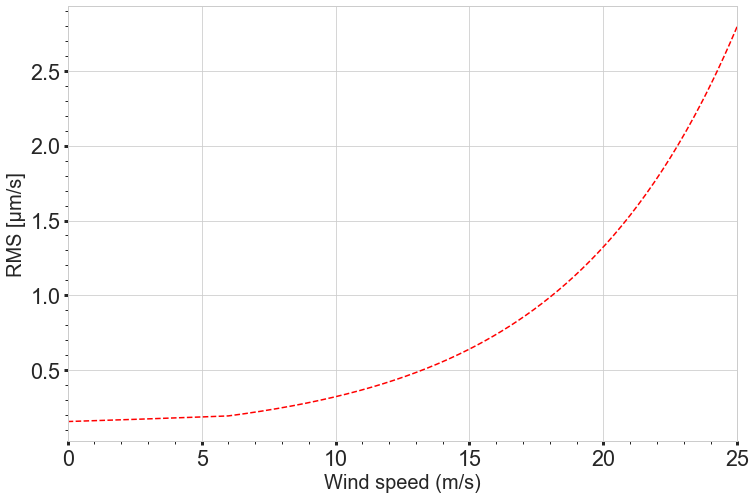

In [64]:
plt.plot(velocity_spectrum.index/10, velocity_spectrum.values, 'r--')

plt.ylabel('RMS [μm/s]')

plt.xlim([0,25])

plt.xlabel('Wind speed (m/s)')

In [65]:
import matplotlib.ticker as mtick
from matplotlib import gridspec

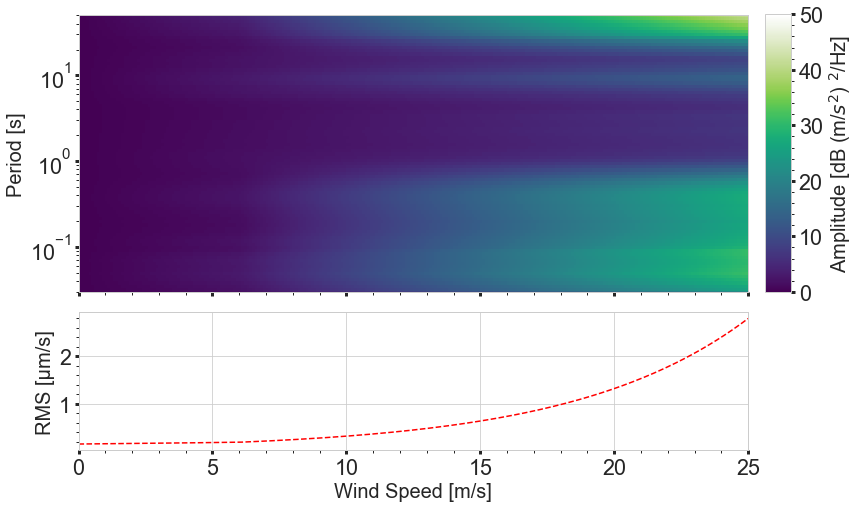

In [67]:


c = np.array(full.columns)
x = np.concatenate((c,[c[-1]+np.diff(c)[-1]]))-np.diff(c)[-1]/2.
r = np.array(full.index)
y = np.concatenate((r,[r[-1]+np.diff(r)[-1]]))-np.diff(r)[-1]/2.
X,Y = np.meshgrid(x,y)

fig, ax = plt.subplots(2, 1, sharey=False, sharex=True, squeeze=True)

#fig.colorbar(pc, )

gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

ax[0] = plt.subplot(gs[0])

ax[1] = plt.subplot(gs[1])

pc = ax[0].pcolormesh(c,r,full.values.astype('float'), vmin= 0,vmax=50, cmap=viridis_white)


ax[0].set_ylim(0.03,50)

ax[0].set_yscale('log')

ax[1].set_xlabel('Wind Speed [m/s]')

ax[0].set_ylabel('Period [s]')

ax[1].plot(velocity_spectrum.index/10, velocity_spectrum.values, 'r--')

ax[1].set_ylabel('RMS [μm/s]')

ax[0].set_xlim(0,25)
ax[1].set_xlim(0,25)
ax[0].set_xticklabels([])

cax = plt.axes([.92, 0.40, 0.03, 0.482])
cb = plt.colorbar(pc, cax=cax, label='Amplitude [dB (m/$s^2$) $^2$/Hz]')

#ax.set_title('ELIS HHZ SMOOTHED MODEL')


plt.subplots_adjust(hspace=0.1)
plt.savefig('Figure4_September2021.png',dpi=300, bbox_inches='tight')
plt.show()

In [69]:
params_2017

,a_lin1,b_lin1,a_lin2,b_lin2
Period,,,,
0.020000,0.153811,-147.453134,0.818193,-151.431160
0.021810,0.213048,-147.120439,0.854752,-150.969699
0.023784,0.232755,-147.040565,0.934713,-151.250266
0.025937,0.262840,-147.146491,1.005302,-151.598771
0.028284,0.279710,-147.302386,1.056603,-151.959468
0.030844,0.338365,-145.788262,1.251720,-151.262633
0.033636,0.370356,-146.397118,1.299941,-151.969632
0.036680,0.411642,-147.585062,1.364142,-153.290752
0.040000,0.466724,-148.692072,1.392076,-154.240558


TypeError: __init__() got an unexpected keyword argument 'color'

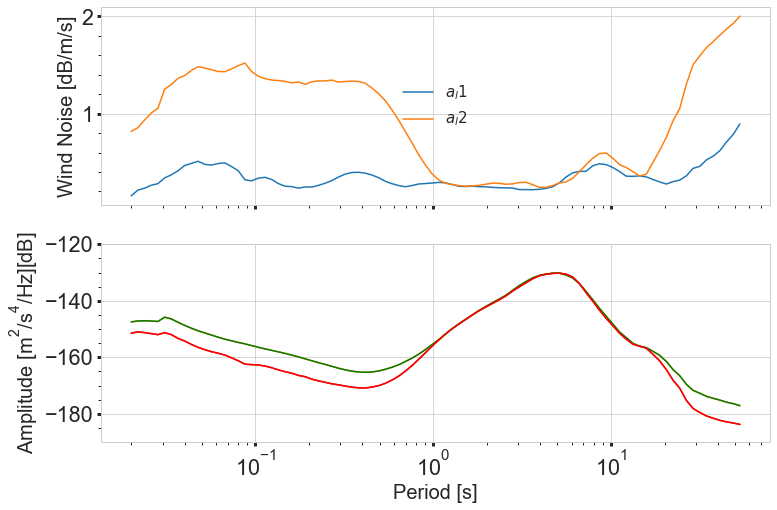

In [78]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(params_2017['a_lin1'], label='a exponential')
ax1.plot(params_2017['a_lin2'], label='a linear')


#ax1.text(0.025, 0.3,r'x = Wind Speed [m/s]', color='black')
#ax1.text(0.025, 0.6,r'y = Noise Amplitude [dB]', color='black')
#ax1.text(0.025, 0.9, r'$[i: 6  \Rightarrow \infty]: y_i=((a_l*x_i) + b_l)$', color='black')
#ax1.text(0.025, 1.2, r'$[i: 0  \Rightarrow 5]: y_i = ((a_e*e(x_i)) +b_e)$', color='black')

ax1.semilogx()

ax2.plot(params_2017)
ax2.set_ylim([-190,-120])
ax2.set_xlabel('Period [s]')
ax2.set_ylabel('Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')
ax1.set_ylabel('Wind Noise [dB/m/s]')
ax2.plot(params_2017['b_lin1'],c='green', label='b exponential')
ax2.plot(params_2017['b_lin2'], c='red', label='b linear')
ax1.legend(["$a_l 1$","$a_l 2$"], loc="center")
ax2.legend(["$b_l 1$","$b_l 2$"], loc="center", color=['g','r'])


ax2.semilogx()
#ax1.set_title('2017 ELIS HHN minimum wind noise model')
#plt.savefig('PNG/Wind Noise Model ELIS/2017_ELIS_HHN_0.1step_weighted_model.13.02.2020.png')

[]

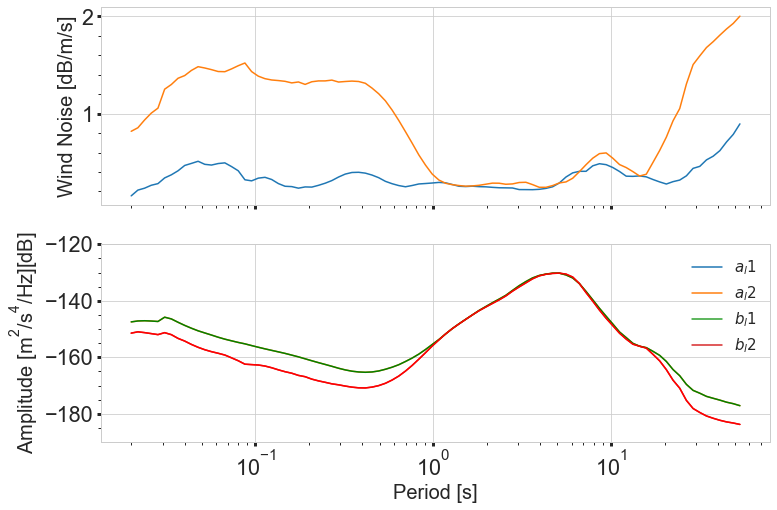

In [76]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(params_2017['a_lin1'], label='a exponential')
ax1.plot(params_2017['a_lin2'], label='a linear')


#ax1.text(0.025, 0.3,r'x = Wind Speed [m/s]', color='black')
#ax1.text(0.025, 0.6,r'y = Noise Amplitude [dB]', color='black')
#ax1.text(0.025, 0.9, r'$[i: 6  \Rightarrow \infty]: y_i=((a_l*x_i) + b_l)$', color='black')
#ax1.text(0.025, 1.2, r'$[i: 0  \Rightarrow 5]: y_i = ((a_e*e(x_i)) +b_e)$', color='black')

ax1.semilogx()

ax2.plot(params_2017)
ax2.set_ylim([-190,-120])
ax2.set_xlabel('Period [s]')
ax2.set_ylabel('Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')
ax1.set_ylabel('Wind Noise [dB/m/s]')
ax2.plot(params_2017['b_lin1'],c='green', label='b exponential')
ax2.plot(params_2017['b_lin2'], c='red', label='b linear')
ax2.legend(["$a_l 1$","$a_l 2$","$b_l 1$","$b_l 2$"], loc="best")



ax2.semilogx()
#ax1.set_title('2017 ELIS HHN minimum wind noise model')
#plt.savefig('PNG/Wind Noise Model ELIS/2017_ELIS_HHN_0.1step_weighted_model.13.02.2020.png')